# Drug Research

Motivation [10]: What problem are you tackling, and what's the setting you're considering? What data are you working on? Did anything change from the proposal regarding data, objectives, and methods that you will apply?


    Opioid-related deaths are steadily on the incline. 

    Is this a large part due to Doctors overprescribing? 

    Are there enough resources helping to stop this issue?

Dataset Composition

    -Connecticut_Medicare_Part_D_Opioid_Prescriber_Summary_File_2014.csv
    
        ['Total Claim Count']
        ['Opioid Claim Count']
        ['Opioid Prescribing Rate']

    -Opioid_Related_Treatment_Admissions_by_Town_in_Department_of_Mental_Health_and_Addiction_Services_Programs.csv

    -Pharmacies_offering_Narcan__Evzio_and_other_brands_of_Naloxone.csv

    -VSRR_Provisional_Drug_Overdose_Death_Counts copy.csv


•Exploratory Data Analysis (EDA) [30]: What data visualizations have you applied? What are your findings in the data before applying any data mining technique? At this stage sufficient EDA should have been done.

•Machine Learning (ML) [10]: Which ML techniques have you tried? What others will you apply?  

•Experiment results [10]: Show the ML experiments that you've run, the outcomes, and any error analysis that you've done.  

•Research questions [20]: Which of the research questions have you tried to answer that you came up with during your proposal?

•Next steps [10]: Given your preliminary results, what are the next steps that you're considering?

•Contributions [10]: By now it should be clear what each person has done/ will do next. Please include a section that describes what each team member worked on and contributed to the project and will contribute in the coming weeks. Each member of the team should have a fair share of the work for the development of a successful project. If a member has not contributed, that should be clearly written as well.

In [98]:
# !pip install folium
# !pip install geopandas
# !pip install plotly

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

import folium
import json
import plotly.express as px


import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics


from sklearn import svm

import os
#os.getcwd()

In [97]:
#Read in the dataset loan_data.csv
Prescriber = pd.read_csv('data/Connecticut_Medicare_Part_D_Opioid_Prescriber_Summary_File_2014.csv')
Treatment = pd.read_csv('data/Opioid_Related_Treatment_Admissions_by_Town_in_Department_of_Mental_Health_and_Addiction_Services_Programs.csv')
Naloxone = pd.read_csv('data/Pharmacies_offering_Narcan__Evzio_and_other_brands_of_Naloxone.csv')
Overdose = pd.read_csv('data/VSRR_Provisional_Drug_Overdose_Death_Counts copy.csv')

In [54]:
#targets
# (Opioid Claim Count)    Connecticut_Medicare_Part_D_Opioid_Prescriber_Summary
Prescriber = pd.read_csv('data/Connecticut_Medicare_Part_D_Opioid_Prescriber_Summary_File_2014.csv')
#Prescriber.columns
a = Prescriber[['Total Claim Count','Opioid Claim Count','Opioid Prescribing Rate']]
a = a.dropna()


# df = Prescriber

Text(0.5, 1.0, 'Opioid Prescribing Rate in Conneticut')

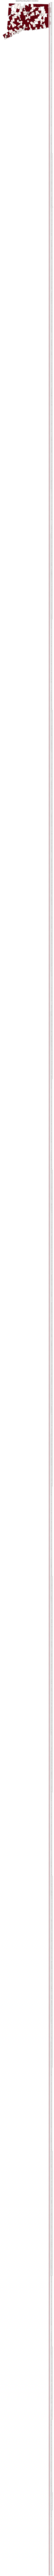

In [91]:
Prescriber = pd.read_csv('data/Connecticut_Medicare_Part_D_Opioid_Prescriber_Summary_File_2014.csv')

df = Prescriber

df['NPPES Provider Zip Code'] = df['NPPES Provider Zip Code'].astype(str)
df['NPPES Provider Zip Code'] = df['NPPES Provider Zip Code'].str.zfill(5)

df.columns = ['NPI', 'NPPES Provider Last/Org Name', 'NPPES Provider First Name',
       'ZIPCode', 'NPPES Provider State',
       'Specialty Description', 'Total Claim Count', 'Opioid Claim Count',
       'Opioid Prescribing Rate']

ct = gpd.read_file('data/ct_connecticut_zip_codes_geo.min.json')

ct.columns = ['STATEFP10', 'ZIPCode', 'GEOID10', 'CLASSFP10', 'MTFCC10',
       'FUNCSTAT10', 'ALAND10', 'AWATER10', 'INTPTLAT10', 'INTPTLON10',
       'PARTFLG10', 'geometry']

#ct.columns
map_df = ct.merge(df, on='ZIPCode')


ct_opioid_rate = map_df.plot(column = map_df['Opioid Prescribing Rate'],cmap = 'Reds',edgecolor = 'black',figsize=(20,12),
                        legend = True,vmin = 0,vmax = 1)

ct_opioid_rate.axis('off')
ct_opioid_rate.set_title("Opioid Prescribing Rate in Conneticut",fontsize = 20)

# ct_opioid_rate = map_df.plot(column = map_df['Opioid Prescribing Rate'],cmap = 'Reds',edgecolor = 'black',figsize=(20,12),
#                         legend = True,vmin = 0,vmax = 1)

# ct_opioid_rate.axis('off')
# ct_opioid_rate.set_title("Opioid Prescribing Rate in Conneticut",fontsize = 20)

# df = Overdose

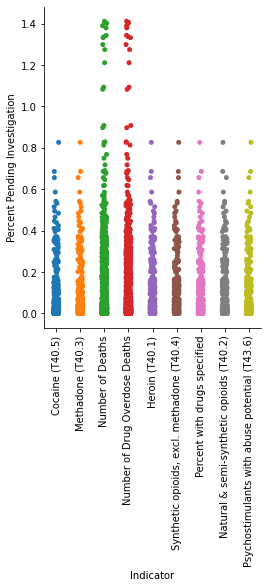

In [95]:
Overdose = pd.read_csv('data/VSRR_Provisional_Drug_Overdose_Death_Counts copy.csv')
df = Overdose
chart = sns.catplot(x = "Indicator", y = "Percent Pending Investigation", hue = 'Indicator', data = df)
chart.set_xticklabels(rotation = 90)

# df = TREATMENT

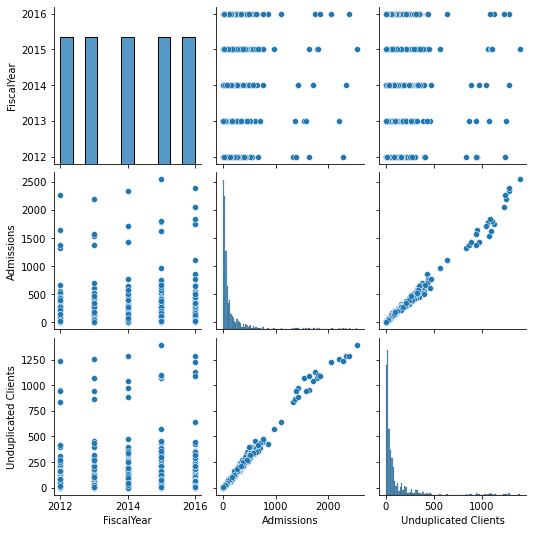

In [96]:
Treatment = pd.read_csv('data/Opioid_Related_Treatment_Admissions_by_Town_in_Department_of_Mental_Health_and_Addiction_Services_Programs.csv')
Opioid_treatment = Treatment 
sns.pairplot(Opioid_treatment)

In [29]:
#Opioid_Prescriber_Summary.head()

In [30]:
#print(Opioid_Treatment.columns)
#Opioid_Treatment.head()

In [31]:
#Naloxone.head()

In [32]:
#Overdose.head()